In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
%load_ext autoreload
%autoreload 2

In [2]:
# Defining a toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                        [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Linear regression

In [3]:
class MyLinearRegression:
    def __init__(self):
        # TODO: Define the parameters of the model (weights and biases)
        dtype = torch.FloatTensor
        self.w = Variable(torch.randn(1).type(dtype), requires_grad = True)
        self.b = Variable(torch.randn(1).type(dtype), requires_grad = True)
    
    def forward(self, x):
        # TODO: implement forward computation - compute predictions based on the inputs
        return x * self.w + self.b
    
    def parameters(self):
        # TODO: this function should return a list of parameters of the model
        return [self.w, self.b]
    
    def __call__(self, x):
        # Convenience function
        return self.forward(x)
    

def mselossfunc(pred, y):
    # TODO: implement the MSE loss function
    raise NotImplementedError

model = MyLinearRegression()
numpy_inputs = np.asarray([0.0, 1.0, 2.0], dtype = np.float32)
torch_inputs = Variable(torch.from_numpy(numpy_inputs))
torch_outputs = model(torch_inputs)
print("Testing model: an input of %s gives a prediction:\n %s" % (numpy_inputs, torch_outputs))

Testing model: an input of [ 0.  1.  2.] gives a prediction:
 Variable containing:
-0.8959
 0.3654
 1.6267
[torch.FloatTensor of size 3]



In [4]:
def train(features, labels, model, lossfunc, optimizer, num_epoch):

    for epoch in range(num_epoch):
        inputs_x = Variable(torch.from_numpy(features), requires_grad = False)
        inputs_y = Variable(torch.from_numpy(labels), requires_grad = False)

        # TODO: Step 2 - compute model predictions and loss
        predictions = model(inputs_x)
        loss = (predictions - inputs_y).pow(2).sum()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 10 == 0:
            print ('Epoch [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epoch, loss.data[0]))
        
        
def visualize(x_train, y_train, model):
    # A convenience function for visualizing predictions given by the model

    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    order = np.argsort(x_train, axis = 0)
    plt.plot(x_train[order].flatten(), y_train[order].flatten(), 'ro', label='Original data')
    plt.plot(x_train[order].flatten(), predicted[order].flatten(), label='Fitted line')
    plt.legend()
    plt.show()

Epoch [1/50], Loss: 380.1703
Epoch [11/50], Loss: 8.1153
Epoch [21/50], Loss: 7.7007
Epoch [31/50], Loss: 7.3168
Epoch [41/50], Loss: 6.9615


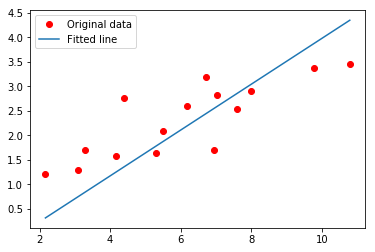

In [5]:
# Training and visualizing predictions made by linear regression model
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features = x_train,
      labels = y_train,
      model = model,
      lossfunc = mselossfunc, 
      optimizer = optimizer,
      num_epoch = 50)
visualize(x_train, y_train, model)

## Linear Regression (using nn package)

Epoch [1/100], Loss: 409.2265
Epoch [11/100], Loss: 3.3615
Epoch [21/100], Loss: 3.3000
Epoch [31/100], Loss: 3.2431
Epoch [41/100], Loss: 3.1904
Epoch [51/100], Loss: 3.1416
Epoch [61/100], Loss: 3.0964
Epoch [71/100], Loss: 3.0546
Epoch [81/100], Loss: 3.0159
Epoch [91/100], Loss: 2.9801


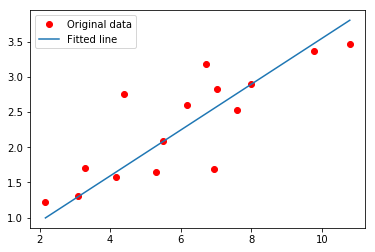

In [11]:
class NNLinearRegression(nn.Module):
    def __init__(self):
        super(NNLinearRegression, self).__init__()
        # TODO: Define the parameters of the model (linear nn layer)
        self.layer = nn.Linear(1, 1)
    
    def forward(self, x):
        # TODO: implement forward computation
        return self.layer(x)
    
# Training and visualizing predictions made by linear regression model (nn package)
# TODO: use loss function from nn package
lossfunc = torch.nn.MSELoss(size_average=False)

model = NNLinearRegression()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features = x_train,
      labels = y_train,
      model = model,
      lossfunc = lossfunc,
      optimizer = optimizer,
      num_epoch = 100)
visualize(x_train, y_train, model)

## MLP

Epoch [1/1000], Loss: 58.5350
Epoch [11/1000], Loss: 7.6202
Epoch [21/1000], Loss: 6.0437
Epoch [31/1000], Loss: 5.9131
Epoch [41/1000], Loss: 5.8222
Epoch [51/1000], Loss: 5.7339
Epoch [61/1000], Loss: 5.6471
Epoch [71/1000], Loss: 5.5617
Epoch [81/1000], Loss: 5.4779
Epoch [91/1000], Loss: 5.3955
Epoch [101/1000], Loss: 5.3145
Epoch [111/1000], Loss: 5.2351
Epoch [121/1000], Loss: 5.1572
Epoch [131/1000], Loss: 5.0808
Epoch [141/1000], Loss: 5.0060
Epoch [151/1000], Loss: 4.9328
Epoch [161/1000], Loss: 4.8613
Epoch [171/1000], Loss: 4.7915
Epoch [181/1000], Loss: 4.7234
Epoch [191/1000], Loss: 4.6570
Epoch [201/1000], Loss: 4.5923
Epoch [211/1000], Loss: 4.5294
Epoch [221/1000], Loss: 4.4682
Epoch [231/1000], Loss: 4.4088
Epoch [241/1000], Loss: 4.3510
Epoch [251/1000], Loss: 4.2949
Epoch [261/1000], Loss: 4.2403
Epoch [271/1000], Loss: 4.1874
Epoch [281/1000], Loss: 4.1360
Epoch [291/1000], Loss: 4.0861
Epoch [301/1000], Loss: 4.0376
Epoch [311/1000], Loss: 3.9904
Epoch [321/1000], 

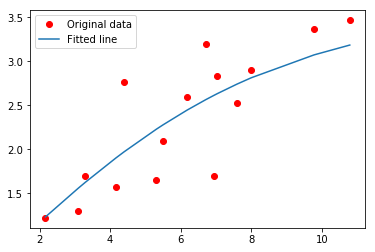

In [28]:
class MLP(nn.Module):
    def __init__(self, hidden_size):
        super(MLP, self).__init__()
        # TODO: Define parameters / layers of a multi-layered perceptron with one hidden layer
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(1, hidden_size),
            torch.nn.Sigmoid(),
            torch.nn.Linear(hidden_size, 1),
        )
    
    def forward(self, x):
        return self.layers(x)
    
# TODO: Play with learning rate, hidden size, and optimizer type for multi-layered perceptron
hidden_size = 10
learning_rate = 1e-3

model = MLP(hidden_size = hidden_size)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train(features = x_train,
      labels = y_train,
      model = model,
      lossfunc = lossfunc,
      optimizer = optimizer,
      num_epoch = 1000)
visualize(x_train, y_train, model)